# Time series analysis and visualization
---

In [11]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from pandas_datareader.data import DataReader
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = [15, 8]

## Part 1

It is not specified what a `period` is. In the following functions, I assume it is a start date and an end date as strings.

In [18]:
def show_correlation(stock_name, start, end):
    stock = DataReader(stock_name, start=start, end=end, data_source='yahoo')[['Open', 'Close']]
    business_month_end = pd.date_range(start, end, freq='BM')
    month_end = stock[stock.index.isin(business_month_end)]
    x = month_end['Open']
    y = month_end['Close']
    plt.scatter(x, y)
    plt.xlabel("Open price in $")
    plt.ylabel("Close price in $")
    plt.title("Correlation of open and close prices of {} stock between {} and {}".format(stock_name, start, end))

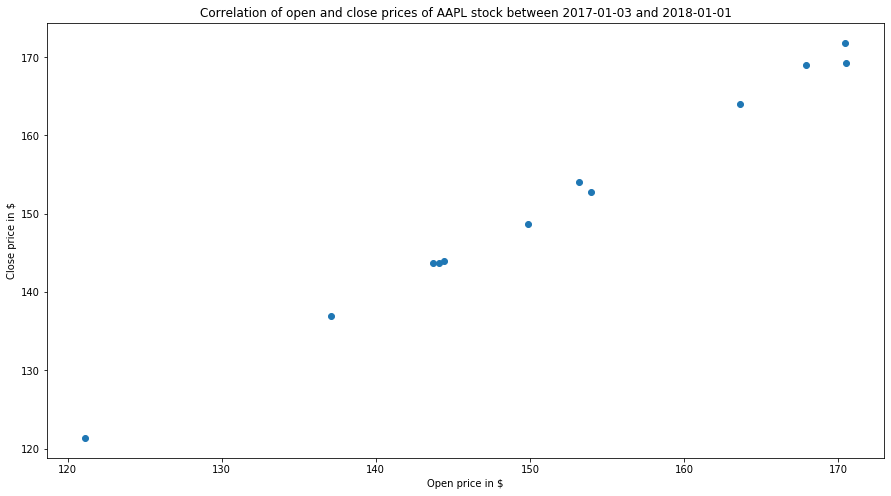

In [19]:
show_correlation('AAPL', '2017-01-03', '2018-01-01')

In [5]:
def show_daily_features(stock_name, start, end):
    stock = DataReader(stock_name, start=start, end=end, data_source='yahoo')
    fig, ax = plt.subplots(2, 2, sharex='col')
    ax[0, 0].plot(stock.index, stock['Low'])
    ax[1, 0].plot(stock.index, stock['High'])
    stock['Open'].hist(ax=ax[0, 1])
    stock['Close'].hist(ax=ax[1, 1])

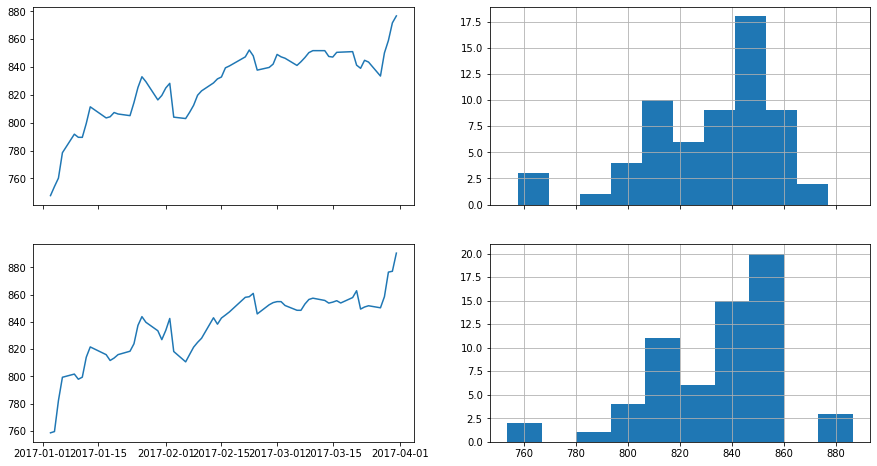

In [6]:
show_daily_features('AMZN', '2017-01-01', '2017-04-01')

In [7]:
def show_monthly_average(stock_name, start, end):
    stock = DataReader(stock_name, start=start, end=end, data_source='yahoo')[['Open', 'Close', 'High', 'Low']]
    monthly_mean = stock.groupby(pd.Grouper(freq='M', label='left')).mean()
    sns.lineplot(data=monthly_mean['Open'], label='Open')
    sns.lineplot(data=monthly_mean['Close'], label='Close')
    sns.lineplot(data=monthly_mean['High'], label='High', color='green')
    sns.lineplot(data=monthly_mean['Low'], label='Low', color='red')    

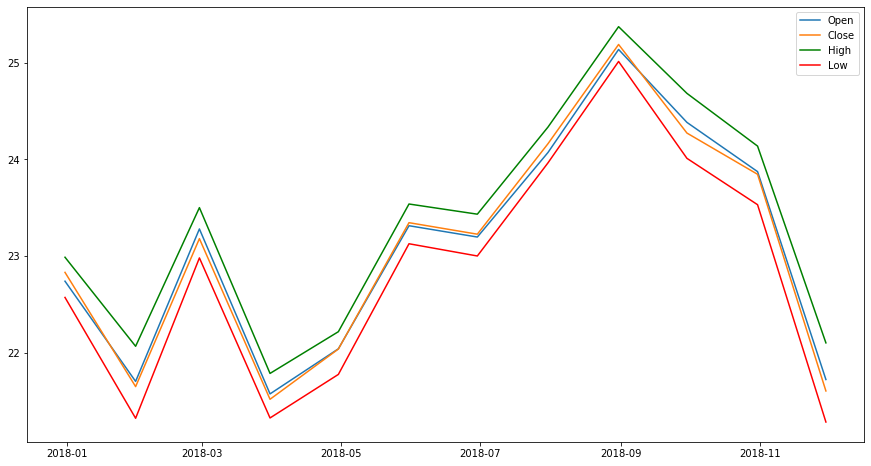

In [8]:
show_monthly_average('HPQ', '2018-01-01', '2019-01-01')

In [9]:
def show_stock_statistics(stock_name, start, end):
    stock = DataReader('AMZN', start='2018-01-01', end='2019-01-01', data_source='yahoo')
    monthly_groupby = stock.groupby(pd.Grouper(freq='M', label='left'))
    monthly_max = monthly_groupby['Close'].max()
    monthly_min = monthly_groupby['Close'].min()
    monthly_mean = monthly_groupby['Close'].mean()
    sns.lineplot(data=monthly_max, label='Max Close', color='green')
    sns.lineplot(data=monthly_min, label='Min Close', color='red')
    sns.lineplot(data=monthly_mean, label='Mean Close', color='blue')


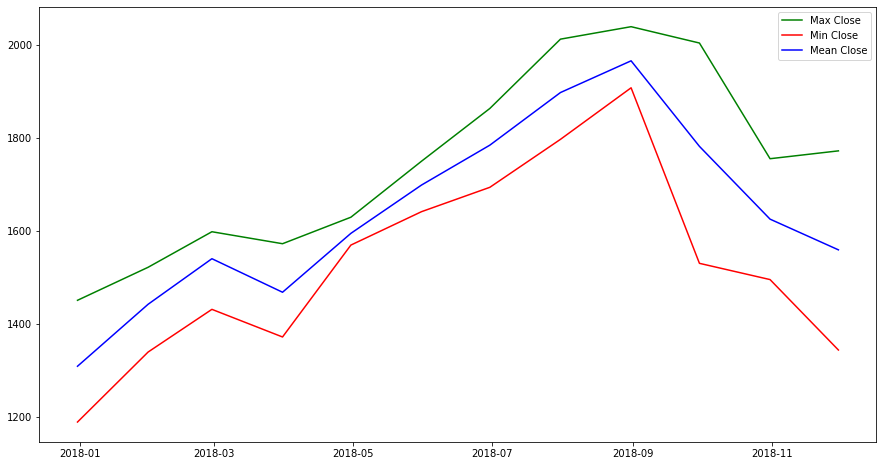

In [10]:
show_stock_statistics('AMZN', '2018-01-01', '2019-01-01')

## Part 2

In [192]:
def normalize_dataframe(df):
    return (df-df.iloc[0])/(df.max()-df.min())

def show_multiple_stocks(stock_list, start, end):
    stocks_close = pd.DataFrame()
    for stock in stock_list:
        stocks_close[stock] = normalize_dataframe(DataReader(stock, start=start, end=end, data_source='yahoo')['Close'])
    
    xmax_gm = stocks_close[stock_list[1]].where(stocks_close.index.year == 2016).idxmax()
    ymax_gm = stocks_close[stock_list[1]].where(stocks_close.index.year == 2016).max()
    
    xmin_tsla = stocks_close[stock_list[2]].where(stocks_close.index.year == 2016).idxmin()
    ymin_tsla = stocks_close[stock_list[2]].where(stocks_close.index.year == 2016).min()
    
    sns.lineplot(data=stocks_close)
    kwargs = dict(ha='center', textcoords='offset pixels', arrowprops=dict(arrowstyle='->'))
    plt.annotate('2016 {} max'.format(stock_list[1]), xy=(xmax_gm, ymax_gm), xytext= (0, -100), **kwargs)
    plt.annotate('2016 {} min'.format(stock_list[2]), xy=(xmin_tsla, ymin_tsla), xytext= (0, +100), **kwargs)
    plt.legend(loc='upper left')
    
    print('2016 {} max = {:+.1%} on {}'.format(stock_list[1], ymax_gm, xmax_gm.strftime('%B %Y')))
    print('2016 {} min = {:+.1%} on {}'.format(stock_list[2], ymin_tsla, xmin_tsla.strftime('%B %Y')))
    

2016 GM max = +22.2% on December 2016
2016 TSLA min = -33.0% on February 2016


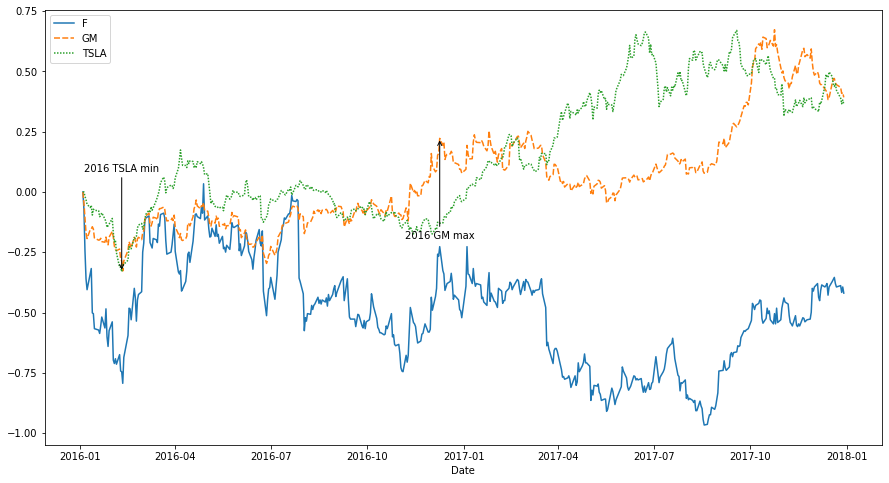

In [193]:
stock_list = ['F', 'GM','TSLA']
show_multiple_stocks(stock_list, '2016-01-04', '2017-12-30')

In [191]:
def normalize_dataframe(df):
    return (df-df.iloc[0])/(df.max()-df.min())

stocks_close = pd.DataFrame()
for stock in stock_list:
    stocks_close[stock] = normalize_dataframe(DataReader(stock, start='2016-01-04', end='2017-12-30', data_source='yahoo')['Close'])
    
xmax_gm = stocks_close[stock_list[1]].where(stocks_close.index.year == 2016).max()
xmax_gm

0.2221653979096511